In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
from scipy.stats import linregress

run_api = False

In [2]:
polling_class_df  = pd.read_csv("ClassSuperHeroesPicks.csv")
polling_jordan_df = pd.read_csv("JordanSuperHeroesPicks.csv")
polling_mikhail_df = pd.read_csv("responses_538.csv")
polling_josh_df = pd.read_csv("JoshNetworkSuperHeroesPicks.csv")
comic_book_sales_df = pd.read_csv("utf8sales.csv")


polling_class_df.drop(columns="Unnamed: 7", index=0, inplace=True)
polling_class_df.reset_index(drop=True,inplace=True)
polling_class_df


polling_jordan_df
polling_mikhail_df
polling_josh_df
polling_class_df


#groupedSales  = comic_book_sales_df.groupby("Comic-book Title").agg
#groupedSales


comic_book_sales_df["Est. Units"] = comic_book_sales_df["Est. Units"].str.replace(',','').astype(float)
gross = comic_book_sales_df["Price"].str.replace('$','').astype(float) * comic_book_sales_df["Est. Units"] 
comic_book_sales_df["Gross"] = gross

comic_book_sales_df.head()



,Publication Year,Comic-book Title,# of Issues,Price,Publisher,Est. Units,Gross
0,2009,Amazing Spider-Man,583,$3.99,Marvel,530500.0,2116695.0
1,2009,Blackest Night,1,$3.99,DC,205500.0,819945.0
2,2009,Captain America Reborn,1,$3.99,Marvel,199900.0,797601.0
3,2009,Batman and Robin,1,$2.99,DC,190300.0,568997.0
4,2009,Blackest Night,2,$3.99,DC,161400.0,643986.0


In [3]:
#groupedSales  = comic_book_sales_df.groupby("Comic-book Title")
#groupedSales


sales_data = comic_book_sales_df
Title_group = sales_data.groupby("Comic-book Title")
Total_Gross = Title_group['Gross'].sum()

Total_units = Title_group['Est. Units'].sum()

#Total_sales = Total_units*Total_units['Price']

Comic_purchases = pd.DataFrame({
    "Total Units" :  Total_units,
    "Total Sales" : Total_Gross
    })

Comic_purchases = Comic_purchases.reset_index()
Comic_purchases = Comic_purchases.rename(columns={"Comic-book Title":"name"})

Comic_purchases

,name,Total Units,Total Sales
0,100th Anniversary Special: Avengers,36605.0,146053.95
1,100th Anniversary Special: Guardians of the Ga...,41203.0,164399.97
2,100th Anniversary Special: Spider-Man,46304.0,184752.96
3,100th Anniversary Special: X-Men,40453.0,161407.47
4,1602 Witch Hunter Angela,38803.0,154823.97
...,...,...,...
1697,Yondu,25664.0,102399.36
1698,You Are Deadpool,32187.0,128426.13
1699,Young Avengers,318200.0,951418.00
1700,Young Justice,265798.0,1138058.02


In [4]:

# combined_df = pd.concat(polling_jordan_df,polling_mikhail_df,polling_josh_df,polling_class_df)
combined_df = polling_class_df.append(polling_jordan_df,).append(polling_mikhail_df).append(polling_josh_df).reset_index(drop=True)
combined_df

,Timestamp,Intelligence,Combat,Speed,Durability,Strength,Power (Non-physical)
0,2020/04/13 9:37:21 PM EST,4,5.0,5,4,5.0,5
1,2020/04/13 9:37:21 PM EST,5,5.0,5,3,4.0,5
2,2020/04/13 9:40:53 PM EST,5,2.0,4,2,2.0,4
3,2020/04/13 9:44:04 PM EST,5,4.0,3,5,4.0,5
4,2020/04/14 12:25:25 PM EST,4,4.0,5,2,2.0,1
5,2020/04/14 1:16:48 PM EST,5,3.0,3,3,4.0,5
6,2020/04/14 2:39:13 PM EST,3,1.0,5,5,4.0,2
7,2020/04/14 6:03:35 PM EST,4,3.0,1,4,3.0,3
8,2020/04/14 8:09:11 PM EST,4,3.0,2,4,4.0,5
9,2020/04/15 7:27:31 PM EST,4,5.0,5,2,3.0,5


In [5]:
polling_jordan_df.Strength.mean()

3.526315789473684

In [6]:
# This is meaningless but cool
#polling_df[["Intelligence","Combat","Speed","Durability","Strength","Power (Non-physical)"]].plot(kind="bar")
#plt.xlabel("Attributes")
#plt.ylabel("Score")

Text(0.5, 1.0, 'Class Poll')

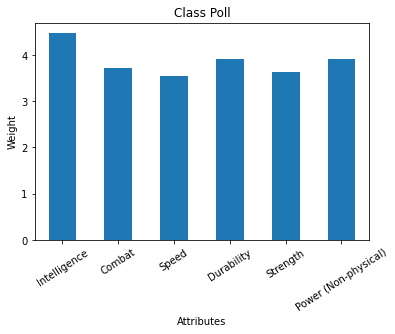

In [7]:
combined_df.mean().plot(kind="bar", rot=33)
plt.xlabel("Attributes")
plt.ylabel("Weight")
plt.title("Class Poll")

In [8]:
heroes_df = pd.DataFrame()

fullList = {}
# fullList_df = pd.DataFrame()

if run_api:
    from api_keys import api_key
    base_url = "https://www.superheroapi.com/api.php/"+api_key+"/"
    for id in range(1,733):
        response = requests.get(base_url + str(id)).json()
        # print(response)
        print(id)
    
        # Printing to a DataFrame was ugly
        #response_df = pd.DataFrame(response)
        #fullList_df = fullList_df.append(response_df)
    
        fullList[id] = response
    
fullList

{}

In [9]:
if run_api:
    #count = 0
    for id in fullList.keys():
        hero = fullList[id]
        
        heroes_df = heroes_df.append({
            "id":int(hero["id"]),
            "name":hero["name"],
            "intelligence":int(hero["powerstats"]["intelligence"]) if hero["powerstats"]["intelligence"] != "null" else None,
            "strength":int(hero["powerstats"]["strength"]) if hero["powerstats"]["strength"] != "null" else None,
            "speed":int(hero["powerstats"]["speed"]) if hero["powerstats"]["speed"] != "null" else None,
            "durability":int(hero["powerstats"]["durability"]) if hero["powerstats"]["durability"] != "null" else None,
            "power":int(hero["powerstats"]["power"]) if hero["powerstats"]["power"] != "null" else None,
            "combat":int(hero["powerstats"]["combat"]) if hero["powerstats"]["combat"] != "null" else None,
                        
            },ignore_index=True )
else:
    heroes_df = pd.read_csv("totalHeroStats.csv")
    heroes_df.drop(columns="Unnamed: 0", inplace=True)


heroes_df

,combat,durability,id,intelligence,name,power,speed,strength
0,64,80,1,38,A-Bomb,24,17,100
1,85,65,2,88,Abe Sapien,100,35,28
2,65,64,3,50,Abin Sur,99,53,90
3,95,90,4,63,Abomination,62,53,80
4,55,100,5,88,Abraxas,100,83,63
...,...,...,...,...,...,...,...,...
562,28,100,728,50,Ymir,98,27,100
563,90,25,729,88,Yoda,100,33,52
564,56,28,730,81,Zatanna,100,23,10
565,28,28,731,50,Zoom,100,100,10


In [10]:
# heroes_df[heroes_df.intelligence is Na]
# Dropping n/a values because of lack of data and THEY'RE NOT EVEN REALLY SUPERHEROES!!!!
heroes_clean_df = heroes_df.dropna().reset_index(drop=True)
heroes_clean_df

,combat,durability,id,intelligence,name,power,speed,strength
0,64,80,1,38,A-Bomb,24,17,100
1,85,65,2,88,Abe Sapien,100,35,28
2,65,64,3,50,Abin Sur,99,53,90
3,95,90,4,63,Abomination,62,53,80
4,55,100,5,88,Abraxas,100,83,63
...,...,...,...,...,...,...,...,...
562,28,100,728,50,Ymir,98,27,100
563,90,25,729,88,Yoda,100,33,52
564,56,28,730,81,Zatanna,100,23,10
565,28,28,731,50,Zoom,100,100,10


In [11]:
# For writing to csv 

# DO NOT RUN!!!!!
#heroes_clean_df.to_csv("totalHeroStats.csv")
#heroes_clean_df




In [12]:
heroesGroupBy_df = heroes_df.groupby("name")
len(heroesGroupBy_df)

559

In [13]:
# fullList[id]
# mean powerstats

norm = combined_df.mean().sum()
weights_df = combined_df.mean()/norm
weights_df


Intelligence            0.192888
Combat                  0.160590
Speed                   0.152516
Durability              0.168665
Strength                0.156677
Power (Non-physical)    0.168665
dtype: float64

In [14]:
heroes_df["Total score"] = heroes_df[[
    "intelligence",
    "combat",
    "speed",
    "durability",
    "strength",
    "power"]].dot(
weights_df.rename({
    "Intelligence": "intelligence",
    "Combat": "combat",
    "Speed": "speed",
    "Durability": "durability",
    "Strength": "strength",
    "Power (Non-physical)": "power"}).squeeze()
)
heroes_df# [["name", "Total score"]]

,combat,durability,id,intelligence,name,power,speed,strength,Total score
0,64,80,1,38,A-Bomb,24,17,100,53.409101
1,85,65,2,88,Abe Sapien,100,35,28,68.178953
2,65,64,3,50,Abin Sur,99,53,90,69.759353
3,95,90,4,63,Abomination,62,53,80,73.662518
4,55,100,5,88,Abraxas,100,83,63,82.068966
...,...,...,...,...,...,...,...,...,...
562,28,100,728,50,Ymir,98,27,100,67.322135
563,90,25,729,88,Yoda,100,33,52,65.690540
564,56,28,730,81,Zatanna,100,23,10,51.280656
565,28,28,731,50,Zoom,100,100,10,52.548332


In [15]:
#groupedbyheroes = heroes_df.groupby("name")["Total score"].mean()
heroesDeduped = pd.DataFrame({
    "Total score" : heroesGroupBy_df["Total score"].mean(),
    "Intelligence" : heroesGroupBy_df["intelligence"].mean(),
    "Combat" : heroesGroupBy_df["combat"].mean(),
    "Speed" : heroesGroupBy_df["speed"].mean(),
    "Durability" : heroesGroupBy_df["durability"].mean(),
    "Power" : heroesGroupBy_df["power"].mean(),
    "Strength": heroesGroupBy_df["strength"].mean()
})

heroesDeduped = heroesDeduped.reset_index()
#Comic_purchases = Comic_purchases.rename(columns={"Comic-book Title":"name"})

heroesDeduped

,name,Total score,Intelligence,Combat,Speed,Durability,Power,Strength
0,A-Bomb,53.409101,38.0,64.0,17.0,80.0,24.0,100.0
1,Abe Sapien,68.178953,88.0,85.0,35.0,65.0,100.0,28.0
2,Abin Sur,69.759353,50.0,65.0,53.0,64.0,99.0,90.0
3,Abomination,73.662518,63.0,95.0,53.0,90.0,62.0,80.0
4,Abraxas,82.068966,88.0,55.0,83.0,100.0,100.0,63.0
...,...,...,...,...,...,...,...,...
554,Yellowjacket II,30.996946,50.0,28.0,35.0,28.0,31.0,10.0
555,Ymir,67.322135,50.0,28.0,27.0,100.0,98.0,100.0
556,Yoda,65.690540,88.0,90.0,33.0,25.0,100.0,52.0
557,Zatanna,51.280656,81.0,56.0,23.0,28.0,100.0,10.0


In [16]:
# This is the final dataFrame which pairs comic books with sales data specifically with named heroes
salesAndPolling_df = heroesDeduped.merge(Comic_purchases,on="name")
salesAndPolling_df

,name,Total score,Intelligence,Combat,Speed,Durability,Power,Strength,Total Units,Total Sales
0,Animal Man,64.986676,56.0,80.0,47.0,85.0,73.0,48.0,727000.0,2173730.00
1,Ant-Man,40.875582,100.0,32.0,23.0,28.0,32.0,18.0,217298.0,867019.02
2,Aquaman,84.197049,81.0,80.0,79.0,80.0,100.0,85.0,2767517.0,8771702.83
3,Batgirl,50.664885,88.0,90.0,33.0,40.0,34.0,11.0,3093195.0,9670063.05
4,Batman,60.284636,90.5,95.0,28.0,52.5,55.0,33.0,15925050.0,59037750.50
...,...,...,...,...,...,...,...,...,...,...
96,Winter Soldier,55.726082,56.0,84.0,35.0,65.0,60.0,32.0,312562.0,961022.38
97,Wolverine,72.728010,63.0,100.0,50.0,100.0,89.0,32.0,3317621.0,13129631.79
98,Wonder Woman,94.482515,88.0,100.0,79.0,100.0,100.0,100.0,5491855.0,18070708.45
99,X-23,66.031572,75.0,95.0,42.0,100.0,55.0,24.0,746018.0,2783756.82


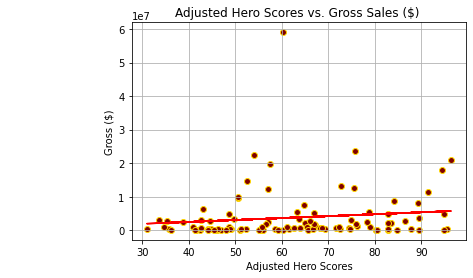

0.1285120032396559
0.20027386130268554


In [17]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Total score"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="maroon",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Adjusted Hero Scores vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Adjusted Hero Scores")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)



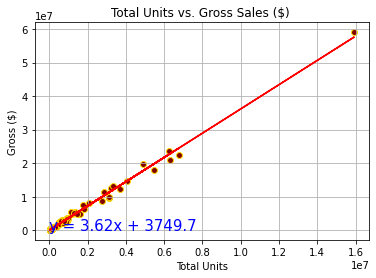

0.9968541113848532
8.124676619670735e-111


In [18]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Total Units"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="maroon",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Total Units vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Total Units")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

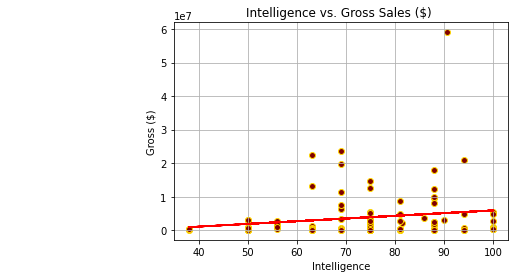

0.16517553820403005
0.09880180591700503


In [19]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Intelligence"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="maroon",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Intelligence vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Intelligence")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

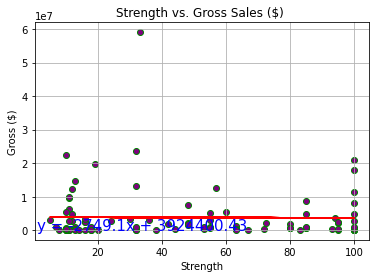

-0.01223813027342179
0.9033224903288457


In [20]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Strength"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="purple",edgecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Strength vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Strength")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

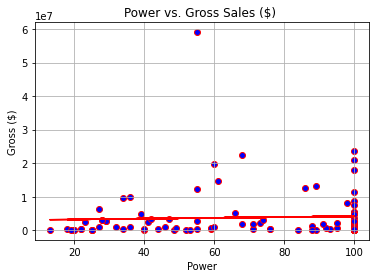

0.04702678821099259
0.6405076572076622


In [21]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Power"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="blue",edgecolors="red")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Power vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Power")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

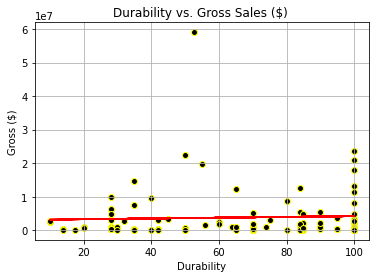

0.04385681759050903
0.6632147879223269


In [22]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Durability"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="black",edgecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Durability vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Durability")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

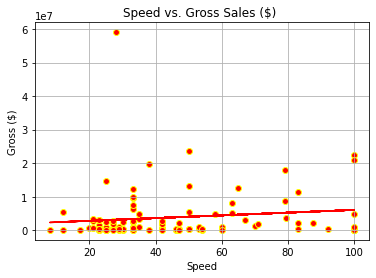

0.13092738759588482
0.19187536131018224


In [23]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Speed"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="red",edgecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Speed vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Speed")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

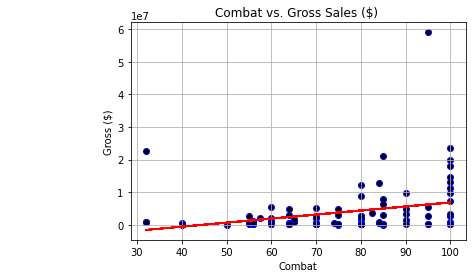

0.28640435961616606
0.0036891557682823747


In [24]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Combat"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="black",edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Combat vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Combat")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

In [25]:
salesAndPolling_df.sort_values("Total Sales")

,name,Total score,Intelligence,Combat,Speed,Durability,Power,Strength,Total Units,Total Sales
68,Raven,48.032068,50.0,40.0,29.0,70.0,84.0,10.0,28374.0,84838.26
80,Spider-Girl,59.203291,63.0,75.0,60.0,65.0,53.0,38.0,24200.0,96558.00
5,Bizarro,84.848725,38.0,85.0,100.0,100.0,100.0,95.0,33755.0,100927.45
27,Doctor Fate,60.332767,81.0,50.0,25.0,80.0,100.0,16.0,34514.0,103196.86
67,Question,44.059078,81.0,80.0,27.0,35.0,20.0,14.0,36400.0,108836.00
...,...,...,...,...,...,...,...,...,...,...
14,Captain America,57.537165,69.0,100.0,38.0,55.0,60.0,19.0,4899659.0,19871013.41
89,Superman,96.433821,94.0,85.0,100.0,100.0,100.0,100.0,6328219.0,21079709.81
32,Flash,54.011587,63.0,32.0,100.0,50.0,68.0,10.0,6784572.0,22490101.28
23,Deadpool,75.740647,69.0,100.0,50.0,100.0,100.0,32.0,6257368.0,23474632.32


In [26]:
salesAndPolling_df.sort_values("Total score")

,name,Total score,Intelligence,Combat,Speed,Durability,Power,Strength,Total Units,Total Sales
51,Kick-Ass,31.011300,38.0,56.0,23.0,35.0,22.0,10.0,79844.0,318577.56
71,Rocket Raccoon,33.658624,50.0,64.0,23.0,28.0,28.0,5.0,764680.0,3051073.20
40,Hit-Girl,34.687008,56.0,65.0,29.0,20.0,27.0,7.0,284340.0,974216.60
38,Hawkeye,35.309804,56.0,80.0,21.0,10.0,29.0,12.0,851420.0,2714350.80
31,Falcon,35.703329,38.0,64.0,50.0,28.0,22.0,13.0,54927.0,219158.73
...,...,...,...,...,...,...,...,...,...,...
98,Wonder Woman,94.482515,88.0,100.0,79.0,100.0,100.0,100.0,5491855.0,18070708.45
88,Supergirl,94.827919,94.0,75.0,100.0,100.0,100.0,100.0,1427441.0,4721456.59
65,Power Girl,94.827919,94.0,75.0,100.0,100.0,100.0,100.0,49300.0,147407.00
58,Martian Manhunter,95.587635,100.0,85.0,92.0,100.0,100.0,95.0,104239.0,378910.61
